# Schelling Segregation Model

## Implementation

 Below, we will import the model class, instantiate it, run it, and plot the time series of the number of happy agents.

In [1]:
import matplotlib.pyplot as plt
import mesa
import pandas as pd
%matplotlib inline

from model3b import Schelling

Now we instantiate a model instance: a 10x10 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 30% similar neighbors.

In [2]:
model = Schelling(30, 30, 0.8, 0.3, 0.3, 0.5)

This is model 3b


We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for either 200 steps or until it stops on its own, whichever comes first:

In [3]:
while model.running and model.schedule.steps < 200:
    model.step()

print(model.schedule.steps) # Show how many steps have actually run

8


In [4]:
print(model.schedule.get_agent_count())

716


In [5]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,happy,total_satisfaction_index,blue_satisfaction_index,red_satisfaction_index,segregated_Agents,happiness reached
0,0,0.000000,0.000000,0.000000,0.074022,False
1,605,0.844972,0.572727,0.965726,0.178771,False
2,654,0.913408,0.763636,0.979839,0.296089,False
3,688,0.960894,0.881818,0.995968,0.372905,False
4,703,0.981844,0.945455,0.997984,0.392458,False
5,708,0.988827,0.968182,0.997984,0.406425,False
6,710,0.991620,0.972727,1.000000,0.407821,False
7,711,0.993017,0.977273,1.000000,0.407821,False
8,711,0.993017,0.977273,1.000000,0.407821,False


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [6]:
model_out = model.datacollector.get_model_vars_dataframe()

In [7]:
model_out.sort_values('happy', ascending=False)

,happy,total_satisfaction_index,blue_satisfaction_index,red_satisfaction_index,segregated_Agents,happiness reached,time
6,718,1.000000,1.000000,1.000000,0.371866,True,6
5,717,0.998607,0.995745,1.000000,0.371866,False,5
4,715,0.995822,0.991489,0.997930,0.370474,False,4
3,707,0.984680,0.978723,0.987578,0.360724,False,3
2,685,0.954039,0.885106,0.987578,0.330084,False,2
1,592,0.824513,0.574468,0.946170,0.225627,False,1
0,0,0.000000,0.000000,0.000000,0.052925,False,0


Finally, we can plot the 'happy' series:

<Axes: >

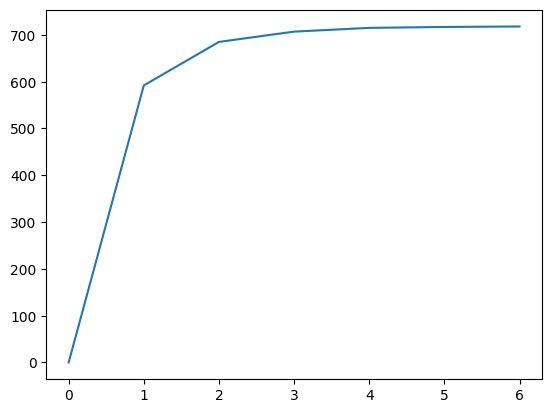

In [8]:
model_out.happy.plot()

# Batchrunner: Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [6]:
import numpy as np
parameters = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2,
              "homophily": np.arange(0.0, 1.0, 0.1), "socioeconomic_homophily_blues" : 0.4}

In [7]:
from mesa import batch_run
param_sweep = batch_run(Schelling,parameters, iterations=10, max_steps=100)

 10%|█         | 10/100 [00:00<00:01, 63.46it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


 27%|██▋       | 27/100 [00:00<00:01, 70.86it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


 35%|███▌      | 35/100 [00:00<00:00, 66.36it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


 55%|█████▌    | 55/100 [00:00<00:00, 53.48it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


 61%|██████    | 61/100 [00:01<00:00, 45.67it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


 75%|███████▌  | 75/100 [00:01<00:00, 53.36it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


 90%|█████████ | 90/100 [00:01<00:00, 49.69it/s]

This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b
This is model 3b


100%|██████████| 100/100 [00:01<00:00, 52.17it/s]

This is model 3b


In [8]:
import pandas as pd
df = pd.DataFrame.from_dict(param_sweep)

In [9]:
df

,RunId,iteration,Step,height,width,density,minority_pc,homophily,socioeconomic_homophily_blues,happy,total_satisfaction_index,blue_satisfaction_index,red_satisfaction_index,segregated_Agents,happiness reached
0,0,0,1,10,10,0.8,0.2,0.0,0.4,80,1.000000,1.000000,1.000000,0.212500,True
1,1,0,3,10,10,0.8,0.2,0.1,0.4,80,0.987654,0.928571,1.000000,0.333333,False
2,2,0,3,10,10,0.8,0.2,0.2,0.4,75,1.000000,1.000000,1.000000,0.680000,True
3,3,0,1,10,10,0.8,0.2,0.3,0.4,73,0.890244,0.181818,1.000000,0.365854,False
4,4,0,3,10,10,0.8,0.2,0.4,0.4,69,0.907895,0.500000,1.000000,0.315789,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,9,6,10,10,0.8,0.2,0.5,0.4,81,0.975904,0.875000,1.000000,0.554217,False
96,96,9,8,10,10,0.8,0.2,0.6,0.4,75,1.000000,1.000000,1.000000,0.840000,True
97,97,9,10,10,10,0.8,0.2,0.7,0.4,72,0.923077,0.571429,1.000000,0.564103,False
98,98,9,100,10,10,0.8,0.2,0.8,0.4,60,0.759494,0.076923,0.893939,0.379747,False


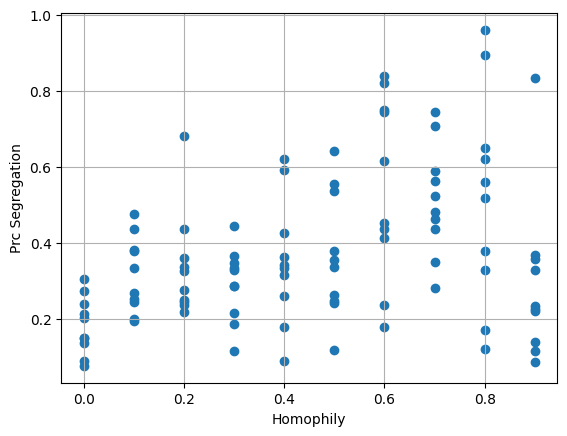

In [10]:
plt.scatter(df.homophily, df.segregated_Agents)
plt.xlabel('Homophily')
plt.ylabel('Prc Segregation')
plt.grid(True)

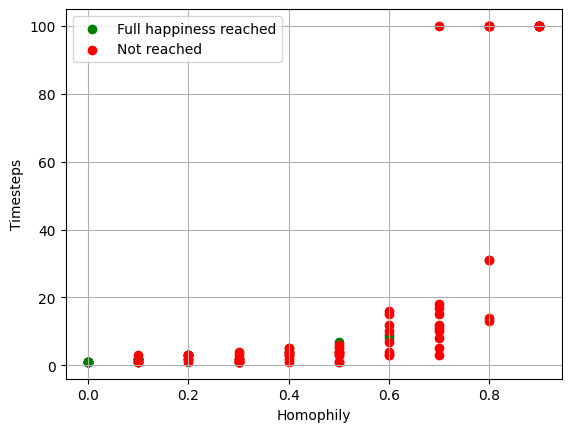

In [27]:
plt.scatter(df[df['happiness reached'] == True].homophily, df[df['happiness reached'] == True].Step, color = 'green')
plt.scatter(df[df['happiness reached'] == False].homophily, df[df['happiness reached'] == False].Step, color = 'red')
plt.xlabel('Homophily')
plt.ylabel('Timesteps')
plt.legend(["Full happiness reached", "Not reached"])
plt.grid(True)
plt.show()